In [27]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score

In [28]:
pfile = 'sf_power.csv'
tfile = 'santafe_temp.csv'

In [29]:
kw = pd.read_csv(pfile, usecols = ['Time', 'Electricity Total'], parse_dates = 'Time', infer_datetime_format = True)
temp = pd.read_csv(tfile, usecols = ['time', 'temperature'], parse_dates = 'Time', infer_datetime_format = True)

In [23]:
#temp = temp.set_index(pd.DatetimeIndex(temp['time']))
#kw = kw.set_index(pd.DatetimeIndex(kw['Time']))

In [30]:
kw.rename(columns={'Time': 'time', 'Electricity Total': 'kw'}, inplace=True)

In [31]:
data = pd.merge(kw, temp, on = 'time')

In [32]:
data = data[(data['time'] != '02/24/2015 14:00:00') | (data['time'] != '02/24/2015 15:00:00')]

In [33]:
data = data[(data['time'] < '03/07/2015 14:00:00') | (data['time'] > '05/08/2015 21:00:00')]

In [34]:
data.time = pd.to_datetime(data['time'])
data['ToD'] = data['time'].apply(lambda x:x.to_datetime().hour)
data['Day'] = data['time'].apply(lambda x:x.to_datetime().weekday())

In [24]:
data_we = data[(data['Day'] > 4)]

In [25]:
data_wd = data[(data['Day'] < 5)]

In [26]:
data_we = data_we[(data_we['kw']  < 3000) | (data_we['kw'] > 5)]
data_wd = data_wd[(data_wd['kw']  < 3000) | (data_wd['kw'] > 5)]

In [24]:
data_wd = data_wd.dropna()

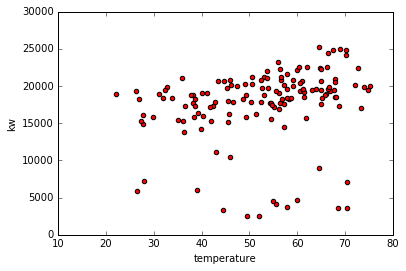

In [34]:
data_wd.plot(x = 'temperature', y = 'kw', kind = 'Scatter', c = 'r')

In [ ]:
data_wd = data_wd.set_index(pd.DatetimeIndex(data_wd['time']))
#data_wdd = data_wd.groupby(pd.TimeGrouper('D')).transform(np.cumsum).resample('D', how='ohlc')
data_wd['kw'] = data_wd['kw'].resample('D').sum()
data_wd['temperature'] = data_wd['temperature'].resample('D').mean()

In [26]:
kwt.time = pd.to_datetime(kwt['time'])
kwt['ToD'] = kwt['time'].apply(lambda x:x.to_datetime().hour)
kwt['Day'] = kwt['time'].apply(lambda x:x.to_datetime().weekday())

NameError: name 'kwt' is not defined

In [27]:
x = data_wd[['temperature']]
y = data_wd[['kw']]
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=42)

In [28]:
linear = LinearRegression()
#x_train.reshape(len(x_train),1)
#y_train.reshape(len(y_train),1)
linear.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
linear.score(x_train, y_train)

0.049081890950871343

In [30]:
linear.coef_

array([[ 94.91126142]])

In [31]:
y_predicted = linear.predict(x_test)

In [32]:
r2_score(y_test, y_predicted)

0.0049923869907938512

In [33]:
linear.intercept_

array([ 12429.37568983])

In [30]:
kwt.to_csv('sf_kwt.csv')